#### Boston Housing Price Predictor

###### Information will be extracted form the BostonHousing.csv provided in the "database" folder

In [25]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

boston = pd.read_csv('../database/BostonHousing.csv')
print(boston.shape)
print(f"Feature names: \n{boston.columns}")

(506, 14)
Feature names: 
Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')


In [26]:
# Rename medv to price data to fit out example
if ('medv' in boston.columns): 
    boston = boston.rename(columns={'medv': 'price'})

boston.head(10)


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [30]:
boston.describe()
boston.info()

# preparing the data for trainning
from sklearn.model_selection import train_test_split

x = boston.copy()
if('price' in x.columns):
    del x['price']

y = boston['price']


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=0)
print(f"xtrain: {x_train.shape}\nxtest: {x_test.shape}\nytrain: {y_train.shape}\nytest: {y_test.shape}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  price    506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB
xtrain: (404, 13)
xtest: (102, 13)
ytrain: (404,)
ytest: (102,)


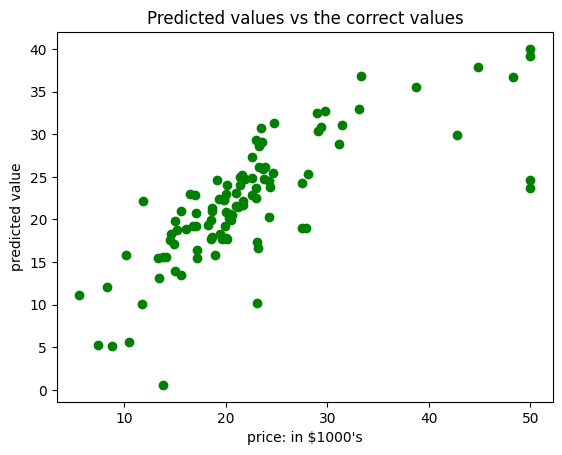

Error measurements
MAE: 3.842909220444503
MSE: 33.448979997676446


In [34]:
# Implementing the algorithm
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(x_train, y_train)

#predict the values
y_pred = reg.predict(x_test)
#Plotting the result

plt.scatter(y_test, y_pred, color="g")
plt.xlabel("price: in $1000's")
plt.ylabel("predicted value")
plt.title("Predicted values vs the correct values")
plt.show()

#Measuring the errors
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"Error measurements\nMAE: {mae}\nMSE: {mse}")

['rm', 'lstat']


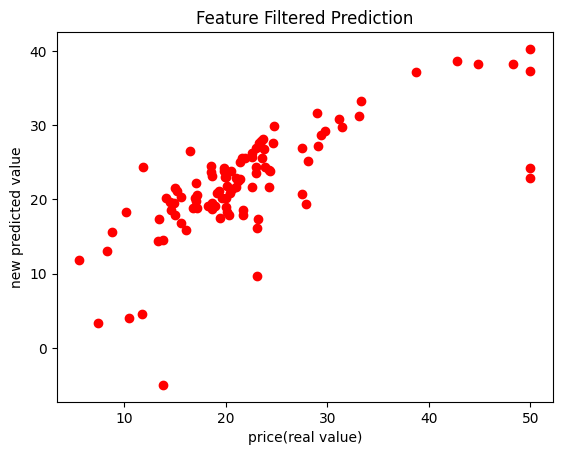

MSE: 37.38310563877995


In [57]:
# Filtering the features based on a score
saved_features = []
for feature_col in x_train:
    sample = x_train[feature_col]
    sample = np.array(sample).reshape(-1, 1)
    testing  = x_test[feature_col]
    testing = np.array(testing).reshape(-1, 1)
    Lreg = LinearRegression()
    Lreg.fit(sample, y_train)
    # getting the prediction and the error measurements
    pred = Lreg.predict(testing)
    mse = mean_squared_error(y_test, pred)
    if mse <= 70.0:
        saved_features.append(feature_col)

print(saved_features)

#Retrain the new set of data
newset = boston[saved_features]
reg = LinearRegression()
newxtrain, newxtest, newytrain, newytest = train_test_split(newset, y, test_size=.2, random_state=0)
reg.fit(newxtrain, newytrain)

pred = reg.predict(newxtest)
#Plotting
plt.scatter(newytest, pred, color='r')
plt.xlabel("price(real value)")
plt.ylabel('new predicted value')
plt.title('Feature Filtered Prediction')
plt.show()

mse = mean_squared_error(newytest, pred)
print(f"MSE: {mse}")